In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn as sk
import seaborn as sns

# Exploratory Data Analysis

In [2]:
bank_data = pd.read_csv("Variant II.csv")
print(bank_data.shape)

(1000000, 32)


In [3]:
bank_data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.7,0.123474,-1,149,30,0.027608,21.599012,AA,1034,...,0,200.0,0,INTERNET,14.851445,other,0,1,0,4
1,0,0.8,0.166159,-1,97,50,0.015207,-1.136921,AB,1371,...,0,200.0,0,INTERNET,9.873092,windows,1,1,0,5
2,0,0.6,0.328567,-1,165,50,0.039634,24.077611,AA,1451,...,1,200.0,0,INTERNET,9.318093,linux,0,1,0,0
3,0,0.7,0.503447,-1,201,50,0.011845,-0.766643,AC,1034,...,1,200.0,0,INTERNET,59.810853,windows,1,1,0,1
4,0,0.4,0.339627,-1,61,50,0.001281,-0.938068,AB,1206,...,0,200.0,0,INTERNET,19.851689,windows,0,1,0,2


In [4]:
bank_data.loc[:,'fraud_bool'] = bank_data.loc[:,'fraud_bool'].astype(bool)
bank_data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,False,0.7,0.123474,-1,149,30,0.027608,21.599012,AA,1034,...,0,200.0,0,INTERNET,14.851445,other,0,1,0,4
1,False,0.8,0.166159,-1,97,50,0.015207,-1.136921,AB,1371,...,0,200.0,0,INTERNET,9.873092,windows,1,1,0,5
2,False,0.6,0.328567,-1,165,50,0.039634,24.077611,AA,1451,...,1,200.0,0,INTERNET,9.318093,linux,0,1,0,0
3,False,0.7,0.503447,-1,201,50,0.011845,-0.766643,AC,1034,...,1,200.0,0,INTERNET,59.810853,windows,1,1,0,1
4,False,0.4,0.339627,-1,61,50,0.001281,-0.938068,AB,1206,...,0,200.0,0,INTERNET,19.851689,windows,0,1,0,2


In [5]:
def measure_compress(value, tick_num):
    return f'{int(value/1000)}K'

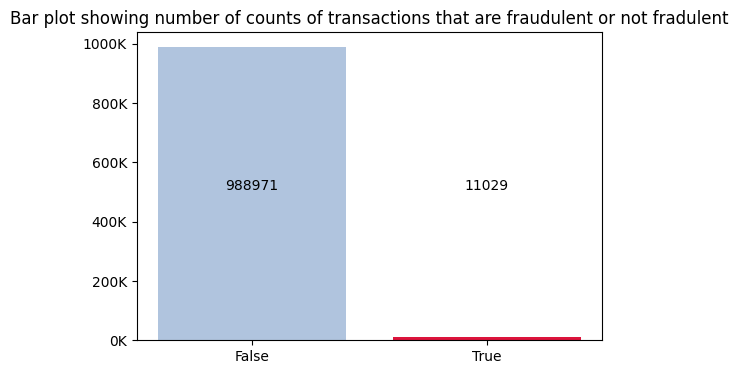

In [6]:
fraud_bool = pd.unique(bank_data.loc[:,'fraud_bool'])
fraud_bool_counts = bank_data.loc[:,'fraud_bool'].value_counts()
plt.figure(figsize=(6,4))
bars = plt.bar(x = ['False', 'True'], height = fraud_bool_counts, color = ['lightsteelblue','crimson'])
y_middle = plt.gca().get_ylim()[1] / 2

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_middle, int(yval), ha='center', va='center')
    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(measure_compress))
plt.title("Bar plot showing number of counts of transactions that are fraudulent or not fradulent")
plt.show()


In [7]:
fraud_bool_counts

fraud_bool
False    988971
True      11029
Name: count, dtype: int64